# 비지도 학습

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [5]:
df = data.copy()

# PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [7]:
df = pca.fit_transform(df)

In [8]:
df.shape

(178, 2)

In [9]:
df[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [10]:
import matplotlib.pyplot as plt

In [11]:
df = pd.DataFrame(df)
df

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


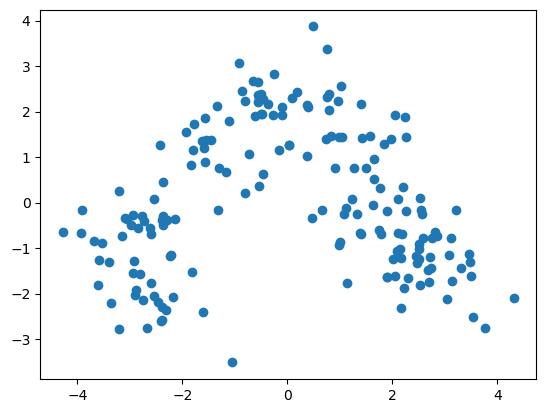

In [12]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [13]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

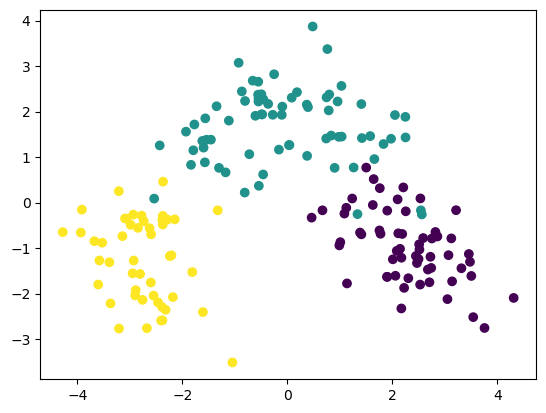

In [14]:
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)

In [15]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.554063383569353


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target,scoring='accuracy', cv=5).mean()

0.9492063492063492

In [17]:
cross_val_score(model, data, dataset.target,scoring='accuracy', cv=5).mean()

0.9553968253968254

In [18]:
df = data.copy()

In [19]:
pca = PCA(n_components=3)

In [20]:
df = pca.fit_transform(df)

In [21]:
df = pd.DataFrame(df)

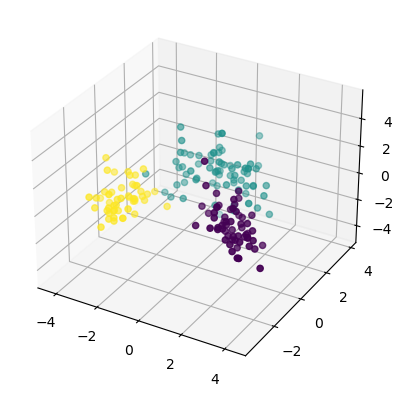

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c=dataset.target)

In [23]:
from sklearn.decomposition import IncrementalPCA

In [24]:
df = data.copy()

In [25]:
pca = IncrementalPCA(n_components=2, batch_size=16)

In [26]:
df = pca.fit_transform(df)

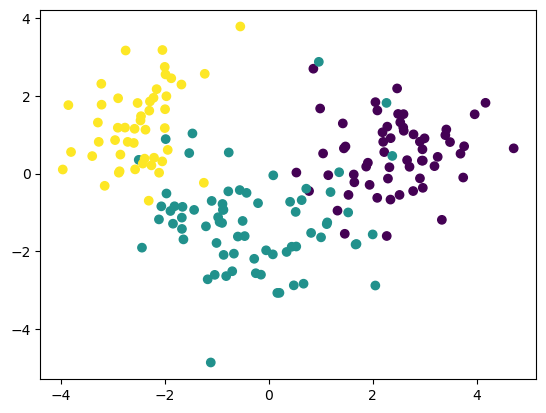

In [27]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)

In [28]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.492411940015439


In [29]:
from sklearn.decomposition import SparsePCA

In [30]:
df = data.copy()

In [31]:
pca = SparsePCA(n_components=2, alpha=0.01)

In [32]:
df = pca.fit_transform(df)

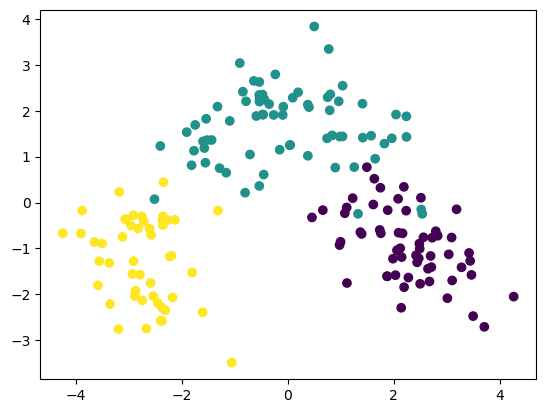

In [33]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)

In [34]:
from sklearn.decomposition import KernelPCA

In [35]:
df = data.copy()

In [36]:
pca = KernelPCA(n_components =2)

In [37]:
df = pca.fit_transform(df)

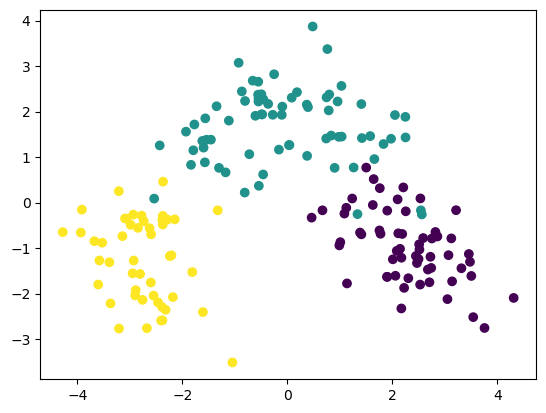

In [38]:
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)

In [39]:
from sklearn.decomposition import TruncatedSVD

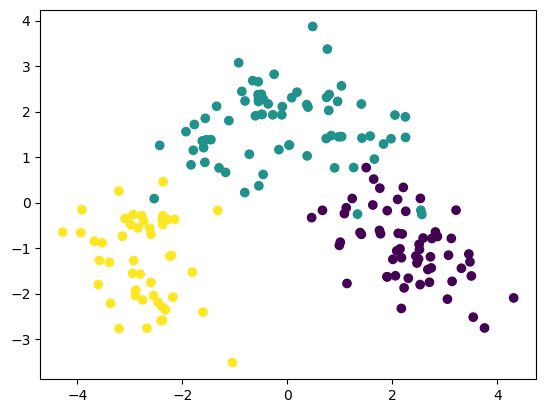

In [40]:
df = data.copy()
svd = TruncatedSVD(n_components=2)
df = svd.fit_transform(df)
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=dataset.target)

# 군집

In [41]:
from sklearn.cluster import KMeans

In [42]:
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [45]:
df['target'] = dataset.target
df['pred'] = pred
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


In [46]:
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [47]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


In [48]:
centers = kmeans.cluster_centers_

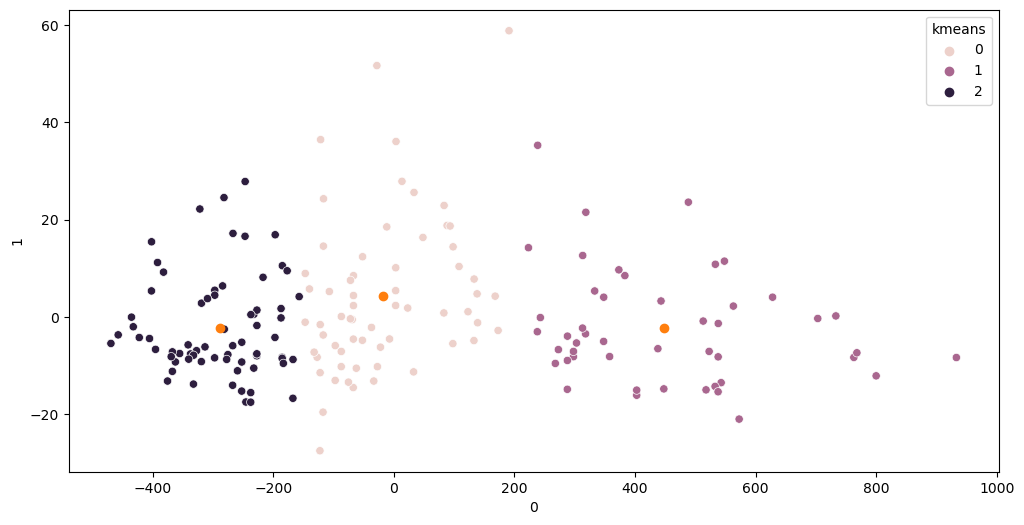

In [49]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=df['kmeans'])
plt.scatter(centers[:,0],centers[:,1])

/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leeseonjae/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

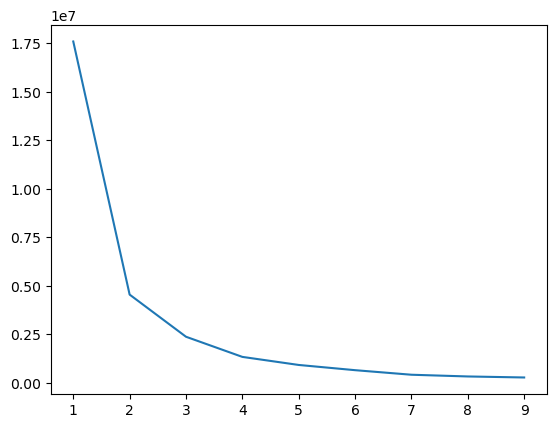

In [50]:
df = data.copy()
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia)

In [51]:
#덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [52]:
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [53]:
print(dataset.target[:3])
print(dataset.target[70:73])
print(dataset.target[160:163])

[0 0 0]
[1 1 1]
[2 2 2]


In [54]:
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
70,123.130138,1.059835
71,-337.104122,-7.623855
72,-275.096026,-7.753152
160,-227.068836,-7.618630
161,-66.755431,8.470290
162,-176.765098,9.473190


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 30.99151241147185, 30.99151241147185, 0.0],
  [0.0, 147.87787795984818, 147.87787795984818, 30.99151241147185],
  [0.0, 48.027378522150784, 48.027378522150784, 0.0],
  [0.0, 88.07194000276095, 88.07194000276095, 48.027378522150784],
  [0.0, 135.87135248973354, 135.87135248973354, 88.07194000276095],
  [0.0, 190.03011431770955, 190.03011431770955, 0.0],
  [135.87135248973354,
   461.0158736911473,
   461.0158736911473,
   190.03011431770955],
  [147.87787795984818,
   1026.3965443828542,
   1026.3965443828542,
   461.0158736911473]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2

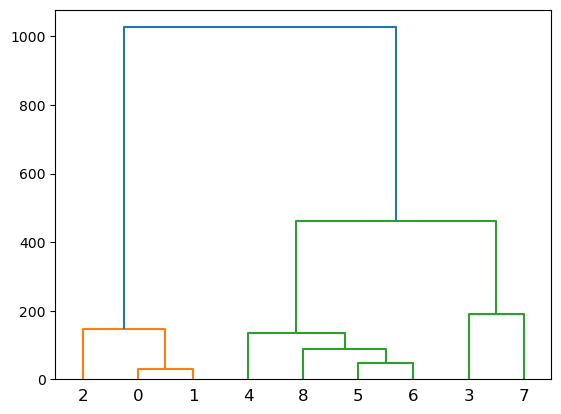

In [55]:
linkage = ward(kdata)
dendrogram(linkage)